In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import transforms
import seaborn as sns
import pandas as pd
import graph_code.graphing_utils as plotting

In [2]:
colwidth = 4.22716535
pagewidth = colwidth * 2

In [3]:
n_points = 10000

In [4]:
output_path = './outputs/graphs/'

In [5]:
early_means = [1,2,3,4,8]
early_std = 1
early_n_points = [n_points, n_points, n_points, n_points, n_points*0.9]
early_n_points = [int(n_p) for n_p in early_n_points]

medium_means = [0.5,0.6,1,3,9]
medium_std = 0.5
medium_n_points = [n_points, n_points, n_points*0.9, n_points*0.7, n_points*0.5]
medium_n_points = [int(n_p) for n_p in medium_n_points]

late_means = [0.2,0.3,0.8,3,10]
late_std = 0.2
late_n_points = [n_points, n_points, n_points*0.7, n_points*0.5, n_points*0.1]
late_n_points = [int(n_p) for n_p in late_n_points]

In [6]:
source_losses = [early_std*np.random.randn(n_p)+mu for mu, n_p in zip(early_means, early_n_points)]
early_loss_df = pd.DataFrame()
for source, losses in enumerate(source_losses):
    early_loss_df = pd.concat([
        early_loss_df,
        pd.DataFrame(losses, columns=['Loss']).assign(Source=source+1),
    ])
early_loss_df = early_loss_df.assign(Period='Early Training')


source_losses = [medium_std*np.random.randn(n_p)+mu for mu, n_p in zip(medium_means, medium_n_points)]
medium_loss_df = pd.DataFrame()
for source, losses in enumerate(source_losses):
    medium_loss_df = pd.concat([
        medium_loss_df,
        pd.DataFrame(losses, columns=['Loss']).assign(Source=source+1),
    ])
medium_loss_df = medium_loss_df.assign(Period='Mid Training')


source_losses = [late_std*np.random.randn(n_p)+mu for mu, n_p in zip(late_means, late_n_points)]
late_loss_df = pd.DataFrame()
for source, losses in enumerate(source_losses):
    late_loss_df = pd.concat([
        late_loss_df,
        pd.DataFrame(losses, columns=['Loss']).assign(Source=source+1),
    ])
late_loss_df = late_loss_df.assign(Period='Late Training')

loss_df = pd.concat([early_loss_df, medium_loss_df, late_loss_df]).reset_index(drop=True)

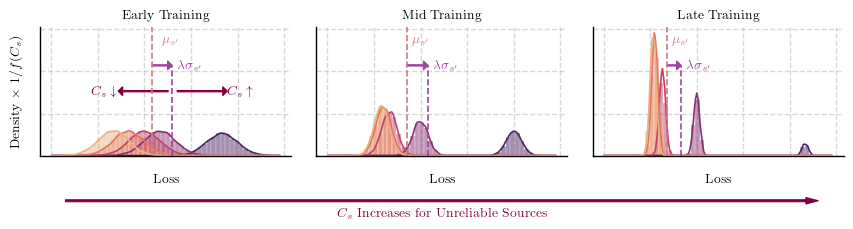

In [7]:
with plotting.paper_theme():
    plt.close()
    width_plot = colwidth
    height_ratio = 0.75

    col_order = ['Early Training', 'Mid Training', 'Late Training']

    g = sns.displot(
        data=loss_df, 
        x='Loss', 
        hue='Source', 
        col='Period', 
        col_order=col_order,
        bins=50,
        kde=True,
        legend=False,
        aspect=height_ratio,
        height=(pagewidth/3)*height_ratio,
        facet_kws={'margin_titles': True,},
        kind='hist',
        palette='flare'
        )
    
    g.set_titles(col_template='{col_name}')
    g.set(yticks=[0, 3000, 6000])
    g.set_xticklabels([])
    g.set_yticklabels([])

    g.figure.subplots_adjust(hspace=0.1, wspace=0.1)

    for ax, col_name in zip(g.axes.flatten(), col_order):
        loss_mean = loss_df.query(f"Period == '{col_name}'")['Loss'].mean()
        loss_std = loss_df.query(f"Period == '{col_name}'")['Loss'].std()

        leniency = 0.5

        locator = mpl.ticker.MaxNLocator(8, integer=True)
        ax.xaxis.set_major_locator(locator)

        locator = mpl.ticker.MaxNLocator(4, integer=True)
        ax.yaxis.set_major_locator(locator)

        ax.axvline(
            x=loss_mean, 
            color='xkcd:dirty pink', 
            linestyle='--'
        )
        ax.text(
            x=loss_mean+0.02*(ax.get_xlim()[1] - ax.get_xlim()[0]),
            y=0.9,
            s=r"$\mu_{s'}$",
            color='xkcd:dirty pink',
            transform=transforms.blended_transform_factory(
                ax.transData, ax.transAxes
            ),
            ha='left',
            va='center',
        )

        ax.arrow(
            x=loss_mean,
            y=0.7,
            dx=leniency*loss_std,
            dy=0,
            width=0.01, 
            head_length = 0.3,
            head_width = 0.07,
            length_includes_head=True,
            color='xkcd:medium purple',
            clip_on=False,
            transform=transforms.blended_transform_factory(
                ax.transData, ax.transAxes
            ),
        )

        ax.text(
            x=loss_mean+leniency*loss_std+0.02*(ax.get_xlim()[1] - ax.get_xlim()[0]),
            y=0.7,
            s=r"$\lambda\sigma_{s'}$",
            ha='left',
            va='center',
            color='xkcd:medium purple',
            transform=transforms.blended_transform_factory(
                ax.transData, ax.transAxes
            ),
        )

        ax.axvline(
            x=loss_mean+leniency*loss_std, 
            ymax=0.7,
            color='xkcd:medium purple', 
            linestyle='--'
        )

        if col_name == 'Early Training':
            ax.arrow(
                x=loss_mean + 1.25*leniency*loss_std,
                y=0.5,
                dx=0.2*(ax.get_xlim()[1] - ax.get_xlim()[0]),
                dy=0,
                width=0.01, 
                head_length = 0.3,
                head_width = 0.07,
                length_includes_head=True,
                color='xkcd:wine',
                clip_on=False,
                transform=transforms.blended_transform_factory(
                    ax.transData, ax.transAxes
                ),
            )
            ax.text(
                x=(
                    loss_mean+leniency*loss_std
                    + 0.2*(ax.get_xlim()[1] - ax.get_xlim()[0])
                    +0.02*(ax.get_xlim()[1] - ax.get_xlim()[0])
                ),
                y=0.5,
                s=r'$C_s  \uparrow$',
                ha='left',
                va='center',
                color='xkcd:wine',
                transform=transforms.blended_transform_factory(
                    ax.transData, ax.transAxes
                ),
            )

            ax.arrow(
                x=loss_mean + 0.8*leniency*loss_std,
                y=0.5,
                dx=-0.2*(ax.get_xlim()[1] - ax.get_xlim()[0]),
                dy=0,
                width=0.01, 
                head_length = 0.3,
                head_width = 0.07,
                length_includes_head=True,
                color='xkcd:wine',
                clip_on=False,
                transform=transforms.blended_transform_factory(
                    ax.transData, ax.transAxes
                ),
            )
            ax.text(
                x=(
                    loss_mean + leniency*loss_std
                    - 0.2*(ax.get_xlim()[1] - ax.get_xlim()[0])
                    - 0.02*(ax.get_xlim()[1] - ax.get_xlim()[0])
                ),
                y=0.5,
                s=r'$C_s  \downarrow$',
                ha='right',
                va='center',
                color='xkcd:wine',
                transform=transforms.blended_transform_factory(
                    ax.transData, ax.transAxes
                ),
            )

        if col_name == 'Early Training':
            ax.set_ylabel(r'Density $ \times ~ 1/f(C_{s})$ ')
        else:
            ax.set_ylabel('')


    # arrow on right
    ax = g.axes.flatten()[0]
    ax.arrow(
        x=0.1,
        y=-0.35,
        dx=3,
        dy=0,
        width=0.015,
        head_length = 0.05,
        head_width = 0.05,
        length_includes_head=True,
        color='xkcd:wine',
        clip_on=False,
        transform=ax.transAxes,
    )

    ax.text(
        x=1.6,
        y=-0.4,
        s='$C_{s}$ Increases for Unreliable Sources',
        color='xkcd:wine',
        transform=ax.transAxes,
        rotation=0,
        va='top',
        ha='center',
    )

    # g.fig.suptitle(
    #     'Loss Distribution During Training',
    #     y=0.98,
    #     x=0.45,
    #     fontsize=10,
    # )

    g.figure.set_size_inches(
        pagewidth,
        pagewidth/len(col_order)*height_ratio
    )

    file_name = output_path + 'source_loss_with_Czeta_h'

    g.figure.subplots_adjust(top=0.91, bottom=0.3, left=0.04, right=0.99)

    plotting.save_fig(
        g.figure, file_name
    )

    plt.show()